In [2]:
from sklearn import datasets
datasets.get_data_home()

'/home/poco/scikit_learn_data'

In [3]:
!ls -al /home/poco/scikit_learn_data/

total 372
drwxr-xr-x  3 poco poco   4096 Jul 20 11:20 .
drwxr-xr-x 23 poco poco   4096 Jul 20 13:37 ..
-rw-r--r--  1 poco poco 366827 Jul  8 12:49 cal_housing_py3.pkz
drwxr-xr-x  3 poco poco   4096 Jul 20 11:20 openml


In [4]:
ls -al /home/poco/scikit_learn_data/openml/

total 12
drwxr-xr-x 3 poco poco 4096 Jul 20 11:20 ./
drwxr-xr-x 3 poco poco 4096 Jul 20 11:20 ../
drwxr-xr-x 4 poco poco 4096 Jul 20 11:29 openml.org/


In [5]:
#fetch_mldata('MNIST original') ->
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [6]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [7]:
X, Y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [8]:
Y.shape

(70000,)

In [9]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [10]:
print(Y_train.shape, Y_test.shape)
print(type(X_train))

(60000,) (10000,)
<class 'pandas.core.frame.DataFrame'>


In [11]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, Y_train = X_train.iloc[shuffle_index], Y_train.iloc[shuffle_index]
shuffle_index

array([18224,  1709, 26636, ..., 46164,  9367, 28877])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [13]:
y_knn_pred = knn_clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print("accuracy score : %.2f\n"% (accuracy_score(Y_test, y_knn_pred)*100) )

accuracy score : 97.140000



In [15]:
#make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=500, noise=0.30, random_state=42)


In [16]:
X.shape, Y.shape

((500, 2), (500,))

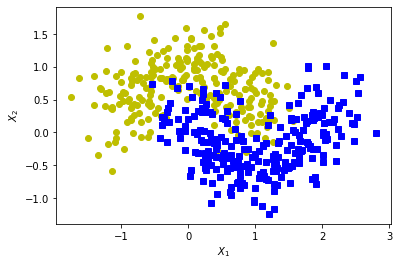

In [17]:
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], 'yo')
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], 'bs')
plt.xlabel('$X_1$')
plt.ylabel("$X_2$")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, Y_train)
y_pred = bag_clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.904


In [21]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(Y_test, y_pred_tree))

0.856


In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, Y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, alpha=0.8, cmap=custom_cmap2)
    plt.plot(X[:,0][Y==0], X[:, 1][Y==0], "yo", alpha=alpha)
    plt.plot(X[:,0][Y==1], X[:, 1][Y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

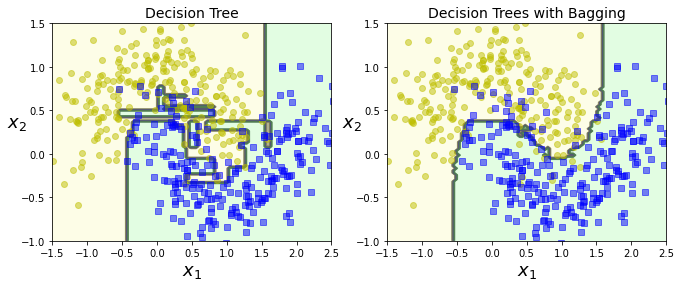

In [23]:
plt.figure(figsize=(11,4))
plt.subplot(11*11)
plot_decision_boundary(tree_clf, X, Y)
plt.title("Decision Tree", fontsize = 14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, Y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()


In [25]:
#adaboost

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

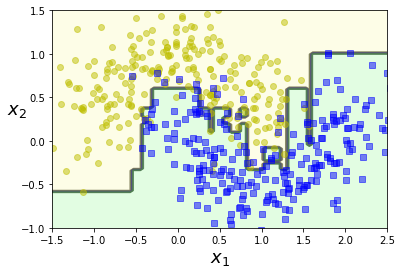

In [26]:
plot_decision_boundary(ada_clf, X, Y)

In [30]:
#random forest
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, Y_train)
y_pred = bag_clf.predict(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, Y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [32]:
print(accuracy_score(Y_test, y_pred))

0.92


In [33]:
print(accuracy_score(Y_test, y_pred_rf))

0.912


In [34]:
np.sum(y_pred == y_pred_rf) / len(y_pred)

0.976

In [38]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682
